# **CIFAR-10 dataset Detection Using CNN Keras**

The CIFAR-10 dataset is a widely used collection of images commonly employed to train machine learning algorithms, particularly in the domain of computer vision and image recognition. It's a popular benchmark for evaluating the performance of various algorithms. Here's a breakdown of key details about CIFAR-10:

**Content:**

* **Images:** The dataset comprises 60,000 small, colored images, each measuring 32x32 pixels.
* **Labels:** Each image belongs to one of 10 distinct object categories:
    * airplane
    * automobile (excluding trucks and pickup trucks)
    * bird
    * cat
    * deer
    * dog
    * frog
    * horse
    * ship
    * truck (excluding pickup trucks)

**Split:**

* **Training Set:** 50,000 images are dedicated for training your machine learning model.
* **Test Set:** The remaining 10,000 images are used to assess the model's performance after training. This split helps ensure the model doesn't simply memorize the training data and can generalize well to unseen examples.

**Origin and Usage:**

* CIFAR-10 was derived from a larger dataset known as "80 Million Tiny Images" and was curated by researchers at the Canadian Institute for Advanced Research (CIFAR).
* Due to its size, manageability, and well-defined categories, CIFAR-10 serves as a valuable resource for researchers and developers to:
    * Train and evaluate image classification algorithms, especially Convolutional Neural Networks (CNNs) which excel at image recognition tasks.
    * Benchmark the performance of different algorithms on a common dataset.
    * Explore and develop new techniques for computer vision and image processing.

**Obtaining the Dataset:**

The CIFAR-10 dataset can be downloaded from the official website of the Canadian Institute for Advanced Research: [https://huggingface.co/datasets/cifar10](https://huggingface.co/datasets/cifar10)

Here are some additional points to consider:

* CIFAR-10 is a relatively small dataset compared to more recent, larger datasets. However, its manageable size makes it a great starting point for beginners in computer vision and image classification.
* There's a sister dataset called CIFAR-100, which offers 100 object categories but with fewer images per class. This dataset presents a more challenging task for image recognition models.

A grayscale (or gray) image and an RGB image are two different types of image representations based on how colors are encoded in the image.

1. **Grayscale Image**:
    - A grayscale image is a single-channel image, which means it contains only one layer of information.
    - Each pixel in a grayscale image represents a shade of gray, ranging from black (0) to white (255).
    - The image only contains intensity information and does not include color information.
    - Grayscale images are often used in image processing and computer vision tasks because they are computationally simpler and can highlight features more effectively.

2. **RGB Image**:
    - An RGB image is a three-channel image, representing red, green, and blue components for each pixel.
    - Each pixel contains a combination of red, green, and blue intensity values, ranging from 0 to 255 for each color.
    - By mixing different levels of these three primary colors, a wide range of colors can be created.
    - RGB images are more common in everyday use and are widely used in digital photography, graphic design, and web design.

In summary, the main difference between a grayscale image and an RGB image is the number of channels used to represent the image. Grayscale images use one channel (intensity), while RGB images use three channels (red, green, blue) to represent color information.

In [ ]:
#load the data of cifar10
from tensorflow.keras.datasets import cifar10

#use keras to import pre-shuffled cifar10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("training set of cifar10 dataset = %d" % len(X_train))
print("testing set of cifar10 dataset = %d" % len(X_test))


170498071/170498071 [==============================] - 3s 0us/step
training set of cifar10 dataset = 50000
testing set of cifar10 dataset = 10000


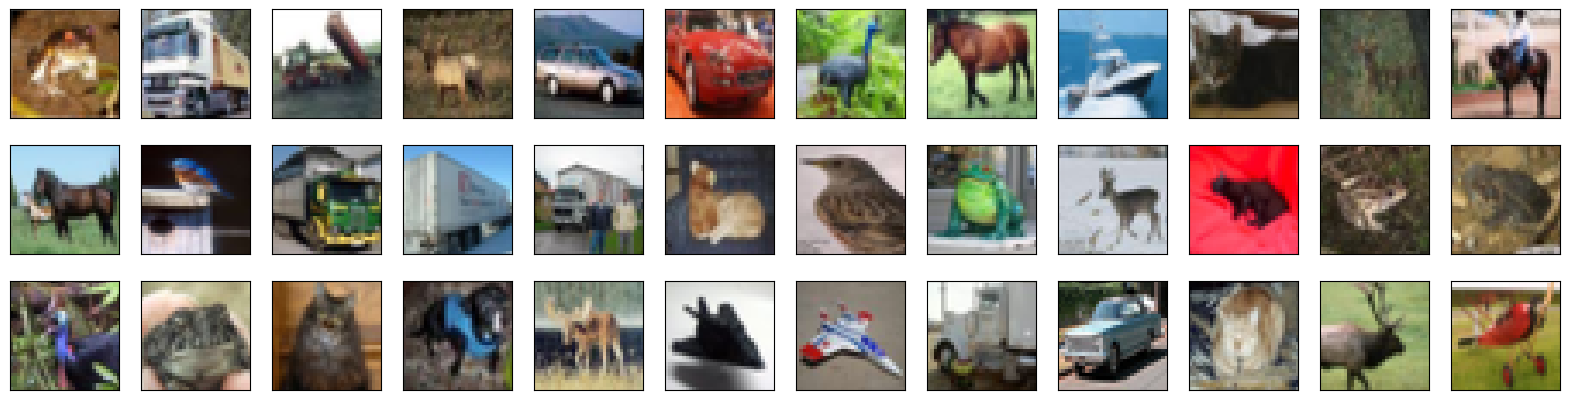

In [ ]:
#visualize the first 36 images
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize = (20, 5))
for i in range(36):
  ax = fig.add_subplot(3, 12, i+1, xticks = [], yticks = [])
  ax.imshow(np.squeeze(X_train[i]))

In [ ]:
#rescale the images by dividing 255
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

print("X_train shape : ", X_train.shape)
print(X_train.shape[0], "train sample")
print(X_test.shape[0], "test sample")

X_train shape :  (50000, 32, 32, 3)
50000 train sample
10000 test sample


In [ ]:
#preprocess the label : encode with One Hot Encoding(OHE)
from tensorflow import keras
from keras.utils import to_categorical

print("Integer Valued Labels : ")
print(y_train[:10])

#One Hot Encoding the data
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#print first ten OHE training labels
print("One Hot Encoded Labels: ")
print(y_train[:10])

Integer Valued Labels : 
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
One Hot Encoded Labels: 
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
#break the data into train, test and valid data
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

#print the number of train,test and valid data
print(X_train.shape[0], "X_train samples")
print(X_valid.shape[0], "X_valid sample")
print(X_test.shape[0], "X_test samples")

45000 X_train samples
5000 X_valid sample
10000 X_test samples


In [ ]:
#define the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#define the model
model = Sequential()

#Conv layer 1
model.add(Conv2D(filters = 16, kernel_size = 3, padding = "same",  activation = "relu", input_shape = (32, 32, 3)))
#MaxPooling layer
model.add(MaxPooling2D(pool_size = 2))

#conv layer 2
model.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"))
#MaxPooling Layer
model.add(MaxPooling2D(pool_size = 2))

#conv layer 3
model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
#MaxPooling layer
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

#flatten for output
model.add(Flatten())

#FC1 : fully connected layer with 500 kernels
model.add(Dense(500, activation = "relu"))
model.add(Dropout(0.4))

#output layer with 10 kernel
model.add(Dense(10, activation= "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [ ]:
#compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [ ]:
#train the mdoel
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = "model.weights.best.hdf5", verbose = 1,
                             save_best_only = True)

hist = model.fit(X_train, y_train, batch_size = 32, epochs = 10,
                 validation_data = (X_valid, y_valid), callbacks = [checkpoint],
                 verbose = 2, shuffle = True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.50491, saving model to model.weights.best.hdf5
1407/1407 - 11s - loss: 1.6157 - accuracy: 0.4120 - val_loss: 1.5049 - val_accuracy: 0.4760 - 11s/epoch - 8ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.50491 to 1.03502, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.2401 - accuracy: 0.5589 - val_loss: 1.0350 - val_accuracy: 0.6418 - 6s/epoch - 4ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 1.03502
1407/1407 - 6s - loss: 1.1014 - accuracy: 0.6133 - val_loss: 1.0389 - val_accuracy: 0.6302 - 6s/epoch - 4ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.03502 to 1.02260, saving model to model.weights.best.hdf5
1407/1407 - 5s - loss: 1.0299 - accuracy: 0.6425 - val_loss: 1.0226 - val_accuracy: 0.6448 - 5s/epoch - 4ms/step
Epoch 5/10

Epoch 5: val_loss improved from 1.02260 to 0.93957, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 0.9813 - accuracy: 0.6622 - val_loss: 0.9396 - val_accuracy: 0.6730 - 6s/epoch - 4ms/step
Epoch 6/10

Epoch 6: val_loss did not improve from 0.93957
1407/1407 - 6s - loss: 0.9492 - accuracy: 0.6756 - val_loss: 0.9577 - val_accuracy: 0.6830 - 6s/epoch - 4ms/step
Epoch 7/10

Epoc

In [ ]:
#load the model
model.load_weights("/content/model.weights.best.hdf5")

In [ ]:
#visulize some prediction
y_hat = model.predict(X_test)

#define the test labels
cifar_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

313/313 [==============================] - 1s 2ms/step


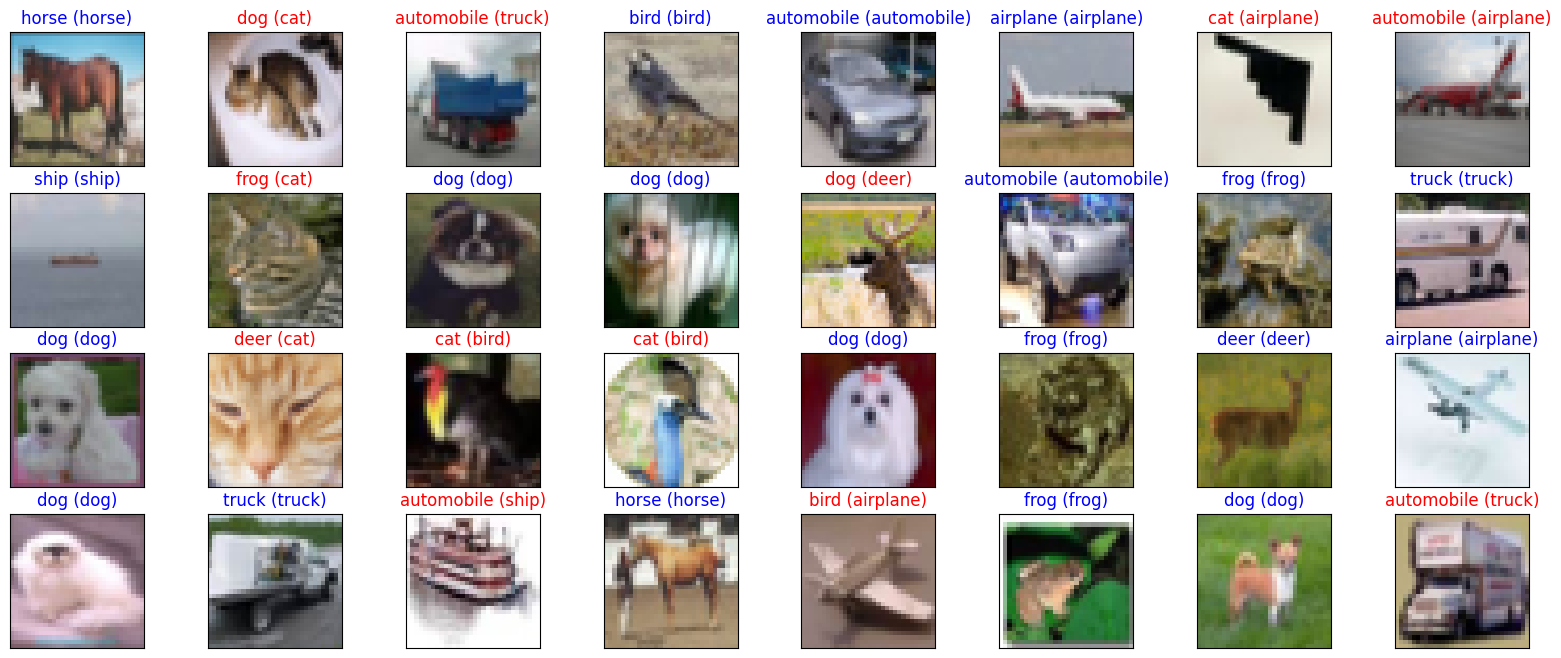

In [ ]:
#plot a random sample
fig = plt.figure(figsize = (20, 8))

for i, idx in enumerate(np.random.choice(X_test.shape[0], size = 32, replace = True)):
  ax = fig.add_subplot(4, 8, i+1, xticks = [], yticks = [])
  ax.imshow(np.squeeze(X_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(cifar_labels[pred_idx], cifar_labels[true_idx]),
               color = ("blue" if pred_idx == true_idx else "red"))

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
acc = 100*score[1]
print("accuracy : %.2f%%" % acc)

accuracy : 71.03%
